In [1]:
pwd

'/home/jose/Desktop/GitLab/hogan_lab/TDMA_python/src'

In [2]:
import numpy as np
import threading

from matplotlib import pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

import tkinter as tk
from tkinter import ttk
from tkinter import filedialog as fd
from tkinter.messagebox import showinfo

import nidaqmx
import CPC
import HV
import DMA

bgColor="dodgerblue"
cColor="white"

In [3]:
import platform
platform.system()

'Linux'

In [4]:
# Default scale
width_default = 1700
height_default = 620

if(platform.system() == 'Linux'):
    scale_width = 1
    scale_height = 1
else:
    from win32api import GetSystemMetrics

    windows_Width = GetSystemMetrics(0)
    windows_Height = GetSystemMetrics(1)

    print("Width =", GetSystemMetrics(0))
    print("Height =", GetSystemMetrics(1))

    if(width_default>windows_Width):
        scale_width = 0.95 * windows_Width/width_default
    else:
        scale_width = 1

    if(height_default>windows_Height):
        scale_height = 0.95 * windows_Height/height_default
    else:
        scale_height = 1
    
dx0 = -200

In [5]:
geometry_size = str(int(width_default*scale_width))+'x'+str(int(height_default*scale_height))
geometry_size

'1700x620'

In [6]:
import time
from datetime import datetime
import matplotlib.image as mpimg
from matplotlib.figure import Figure

In [7]:
print(datetime.now())

2023-03-30 08:45:37.302445


In [8]:
def save_data(tydata,outpath,filename):
    date_time = str(datetime.now()).replace(":","_")
    save_file_name = date_time+filename
    np.savetxt(save_file_name, tydata, delimiter=',')
def Plot_TDMA_diagram(frameFig):
    fig, ax = plt.subplots(num=None, figsize=(8, 8), dpi=100)
    img = mpimg.imread('Figures/tDMA.png')
    ax.imshow(img)
    plt.axis('off')
    #plt.axis("tight")  # gets rid of white border
    plt.axis("image")  # square up the image instead of filling the "figure" space
    plt.show()
    canvas = FigureCanvasTkAgg(fig, frameFig)
    canvas.get_tk_widget().pack()

In [9]:
class MyGUI:
    def __init__(self):
        
        self.create_window()
        self.Initialize_global_variables()
        self.add_widgets()
        
        # Generate DMA class
        self.dma1 = DMA.DMAscan(1, self.entriesDAQ1,
                                self.entriesScan1,
                                self.entriesHV1,
                                self.entriesFileName,
                                self.entriesDMA1)
        self.dma2 = DMA.DMAscan(2, self.entriesDAQ2,
                                self.entriesScan2,
                                self.entriesHV2,
                                self.entriesFileName,
                                self.entriesDMA2)
        
        self.Buttons()
        
        self.update()
        
    def create_window(self):
        self.window = tk.Tk()
        self.window.title("TDMA Charge Distributions")
        self.window.geometry(geometry_size)
        self.window.configure(bg=bgColor)
    
    def Initialize_global_variables(self):
        self.Dp_fix = 1e-09
        self.V_fix = 100
        self.scanDMA1 = True
    
    # Drop Menu Plot results: function to change plot type
    def define_plot_option(self,plot_opt):
        if(self.scanDMA1):
            if(plot_opt == "Voltage"):
                self.dma1.xflag = 0
            elif(plot_opt == "Diameter"):
                self.dma1.xflag = 1
            elif(plot_opt == "Mobility"):
                self.dma1.xflag = 2
            elif(plot_opt == "Charges"):
                self.dma1.xflag = 3
            self.dma1.updateFlag = 1
        else:
            if(plot_opt == "Voltage"):
                self.dma2.xflag = 0
            elif(plot_opt == "Diameter"):
                self.dma2.xflag = 1
            elif(plot_opt == "Mobility"):
                self.dma2.xflag = 2
            elif(plot_opt == "Charges"):
                self.dma2.xflag = 3
            self.dma2.updateFlag = 1
            
    def add_widgets(self):
        plot_options = ["Diameter", "Voltage", "Mobility", "Charges"]
        var_plot_options = tk.StringVar()
        var_plot_options.set("Voltage")
        DropMenu_plot_options = tk.OptionMenu(self.window, var_plot_options, *plot_options,
                                              command=self.define_plot_option)
        DropMenu_plot_options.place(x=(620+dx0)*scale_width,
                                    y=560*scale_height)

        # Frame setting
        self.frameDAQ=tk.LabelFrame(self.window,text="DAQ settings",font=("",15),background=bgColor,foreground="white")
        self.frameScan1=tk.LabelFrame(self.window,text="Scan1 mode",font=("",15),background=bgColor,foreground="white")
        self.frameScan2=tk.LabelFrame(self.window,text="Scan2 mode",font=("",15),background=bgColor,foreground="white")
        self.frameHV1=tk.LabelFrame(self.window,text="HV1 parameters",font=("",15),background=bgColor,foreground="white")
        self.frameHV2=tk.LabelFrame(self.window,text="HV2 parameters",font=("",15),background=bgColor,foreground="white")
        self.frameFile=tk.LabelFrame(self.window,text="File setting",font=("",15),background=bgColor,foreground="white")
        self.frameFix1=tk.LabelFrame(self.window,text="Fixed DMA1",font=("",15),background=bgColor,foreground="white")
        self.frameFix2=tk.LabelFrame(self.window,text="Fixed DMA2",font=("",15),background=bgColor,foreground="white")
        self.frameDMA1=tk.LabelFrame(self.window,text="DMA1 parameters",font=("",15),background=bgColor,foreground="white")
        self.frameDMA2=tk.LabelFrame(self.window,text="DMA2 parameters",font=("",15),background=bgColor,foreground="white")
        self.frameFig=tk.LabelFrame(self.window,background=bgColor,bd=0)

        # Location of the frames
        dy = 100
        dx = 450
        self.frameDAQ.place(x=10*scale_width,
                            y=10*scale_height,
                            width=195*scale_width,
                            height=300*scale_height)
        self.frameScan1.place(x=(1000+dx0)*scale_width,
                              y=10*scale_height,
                              width=195*scale_width,
                              height=305*scale_height)
        self.frameScan2.place(x=(1220+dx0)*scale_width,
                              y=10*scale_height,
                              width=195*scale_width,
                              height=305*scale_height)
        self.frameHV1.place(x=(1000+dx0)*scale_width,
                            y=(215+dy)*scale_height,
                            width=195*scale_width,
                            height=100*scale_height)
        self.frameHV2.place(x=(1220+dx0)*scale_width,
                            y=(215+dy)*scale_height,
                            width=195*scale_width,
                            height=100*scale_height)
        self.frameFile.place(x=(1000+dx+dx0)*scale_width,
                             y=500*scale_height,
                             width=405*scale_width,
                             height=70*scale_height)
        self.frameFix1.place(x=(1000+dx+dx0)*scale_width,
                             y=(215+dy)*scale_height,
                             width=195*scale_width,
                             height=170*scale_height)
        self.frameFix2.place(x=(1220+dx+dx0)*scale_width,
                             y=(215+dy)*scale_height,
                             width=195*scale_width,
                             height=170*scale_height)
        self.frameDMA1.place(x=(1000+dx0)*scale_width,
                             y=(320+dy)*scale_height,
                             width=195*scale_width,
                             height=170*scale_height)
        self.frameDMA2.place(x=(1220+dx0)*scale_width,
                             y=(320+dy)*scale_height,
                             width=195*scale_width,
                             height=170*scale_height)
        self.frameFig.place(x=(1000+dx+dx0)*scale_width,
                            y=30*scale_height,
                            width=400*scale_width,
                            height=280*scale_height)
    
        # Labels for variables
        self.labelsDAQ=np.array(["CPC connection","V_CPC min","V_CPC max",
                            "HV1 connection","V_HV1 min","V_HV1 max",
                            "HV2 connection","V_HV2 min","V_HV2 max"])
        self.labelsScan=np.array(["Min voltage","Max voltage","Time per a bin","Number of bins","Delay time","HV mode","CPC mode"])
        self.labelsHV=np.array(["      Slope      ","Bias"])
        self.labelsFix=np.array(["      Voltage      ","CPC mode"])
        self.labelsDMA=np.array(["Lenght","Inner radius","Outer radius","Sheath flow","Aerosol flow"])

        # Units of variables
        unitsDAQ=np.array([" ","V","V"," ","V","V"," ","V","V"])
        unitsScan=np.array(["V","V","s"," ","s"," "," "])
        unitsHV=np.array([" ","V"])
        unitsFix=np.array(["V"," "])
        unitsDMA=np.array(["mm","mm","mm","L/min","L/min"])

        # Initial values
        initialsDAQ=np.array(["Dev33/ai0",0,10,"Dev33/ao1",0,5,"Dev33/ao0",0,10])
        initialsScan1=np.array([10,1000,5,10,2,0,-1])
        initialsScan2=np.array([10,1000,5,10,2,0,-1])
        initialsHV1=np.array([1000,0])
        initialsHV2=np.array([955,0])
        initialsFix1=np.array([10,-1])
        initialsFix2=np.array([10,-1])
        initialsDMA1=np.array([443, 9.37, 19.61, 4.1, 1.5])
        initialsDMA2=np.array([443,   9.37, 19.61, 7, 1.5])

        # Initialize entries
        self.entriesDAQ1=[]
        self.entriesDAQ2=[]
        self.entriesScan1=[]
        self.entriesScan2=[]
        self.entriesHV1=[]
        self.entriesHV2=[]
        self.entriesFix1=[]
        self.entriesFix2=[]
        self.entriesDMA1=[]
        self.entriesDMA2=[]

        # Arrange labels, entries, and units in frames
        for i in np.arange(np.size(self.labelsDAQ)-3):
            label = tk.Label(self.frameDAQ,text=self.labelsDAQ[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesDAQ1=np.append(self.entriesDAQ1,tk.Entry(self.frameDAQ,width=10))
            self.entriesDAQ1[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesDAQ1[i].delete(0,tk.END)
            self.entriesDAQ1[i].insert(tk.END,initialsDAQ[i])
            label = tk.Label(self.frameDAQ,text=unitsDAQ[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        j=0
        for i in np.append(np.arange(3), np.arange(np.size(self.labelsDAQ)-3,np.size(self.labelsDAQ))):
            label = tk.Label(self.frameDAQ,text=self.labelsDAQ[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesDAQ2=np.append(self.entriesDAQ2,tk.Entry(self.frameDAQ,width=10))
            self.entriesDAQ2[j].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesDAQ2[j].delete(0,tk.END)
            self.entriesDAQ2[j].insert(tk.END,initialsDAQ[i])
            label = tk.Label(self.frameDAQ,text=unitsDAQ[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
            j = j+1
        for i in np.arange(np.size(self.labelsScan)):
            label = tk.Label(self.frameScan1,text=self.labelsScan[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesScan1=np.append(self.entriesScan1,tk.Entry(self.frameScan1,width=10))
            self.entriesScan1[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesScan1[i].delete(0,tk.END)
            self.entriesScan1[i].insert(tk.END,initialsScan1[i])
            label = tk.Label(self.frameScan1,text=unitsScan[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(self.labelsScan)):
            label = tk.Label(self.frameScan2,text=self.labelsScan[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesScan2=np.append(self.entriesScan2,tk.Entry(self.frameScan2,width=10))
            self.entriesScan2[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesScan2[i].delete(0,tk.END)
            self.entriesScan2[i].insert(tk.END,initialsScan2[i])
            label = tk.Label(self.frameScan2,text=unitsScan[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(self.labelsHV)):
            label = tk.Label(self.frameHV1,text=self.labelsHV[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesHV1=np.append(self.entriesHV1,tk.Entry(self.frameHV1,width=10))
            self.entriesHV1[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesHV1[i].delete(0,tk.END)
            self.entriesHV1[i].insert(tk.END,initialsHV1[i])
            label = tk.Label(self.frameHV1,text=unitsHV[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(self.labelsHV)):
            label = tk.Label(self.frameHV2,text=self.labelsHV[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesHV2=np.append(self.entriesHV2,tk.Entry(self.frameHV2,width=10))
            self.entriesHV2[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesHV2[i].delete(0,tk.END)
            self.entriesHV2[i].insert(tk.END,initialsHV2[i])
            label = tk.Label(self.frameHV2,text=unitsHV[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(self.labelsFix)):
            label = tk.Label(self.frameFix1,text=self.labelsFix[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesFix1=np.append(self.entriesFix1,tk.Entry(self.frameFix1,width=10))
            self.entriesFix1[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesFix1[i].delete(0,tk.END)
            self.entriesFix1[i].insert(tk.END,initialsFix1[i])
            label = tk.Label(self.frameFix1,text=unitsFix[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(self.labelsFix)):
            label = tk.Label(self.frameFix2,text=self.labelsFix[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesFix2=np.append(self.entriesFix2,tk.Entry(self.frameFix2,width=10))
            self.entriesFix2[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesFix2[i].delete(0,tk.END)
            self.entriesFix2[i].insert(tk.END,initialsFix2[i])
            label = tk.Label(self.frameFix2,text=unitsFix[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(self.labelsDMA)):
            label = tk.Label(self.frameDMA1,text=self.labelsDMA[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesDMA1=np.append(self.entriesDMA1,tk.Entry(self.frameDMA1,width=10))
            self.entriesDMA1[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesDMA1[i].delete(0,tk.END)
            self.entriesDMA1[i].insert(tk.END,initialsDMA1[i])
            label = tk.Label(self.frameDMA1,text=unitsDMA[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)
        for i in np.arange(np.size(self.labelsDMA)):
            label = tk.Label(self.frameDMA2,text=self.labelsDMA[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=0)
            self.entriesDMA2=np.append(self.entriesDMA2,tk.Entry(self.frameDMA2,width=10))
            self.entriesDMA2[i].grid(row=[i],column=1,sticky=tk.EW)
            self.entriesDMA2[i].delete(0,tk.END)
            self.entriesDMA2[i].insert(tk.END,initialsDMA2[i])
            label = tk.Label(self.frameDMA2,text=unitsDMA[i],background=bgColor,foreground=cColor)
            label.grid(row=[i],column=2)

        # File control
        self.entriesFileName=tk.Entry(self.frameFile,width=50)
        self.entriesFileName.grid(row=0,column=1,sticky=tk.EW)
        self.entriesFileName.delete(0,tk.END)
        self.entriesFileName.insert(tk.END,"")
        for i in [0,2,4]:
            tk.Label(self.frameFile,text=" ",background=bgColor).grid(row=0,column=i)
            
        open_button = tk.Button(self.frameFile,text='Select a File',command=self.select_file)
        open_button.grid(row=0,column=3,sticky=tk.EW)
    
    def select_file(self):
        filename = fd.askopenfilename(title='Open a file',initialdir='C:/Users/Public/')
        showinfo(title='Selected File',message=filename)
        self.entriesFileName.delete(0,tk.END)
        self.entriesFileName.insert(tk.END,filename)

    # function to stop/start scan
    def DMA_scan_status1(self):
        self.window.configure(bg="green")
        self.dma1.scan(Dp_fix,V_fix)
        self.window.configure(bg=bgColor)
    def DMA_scan_status2(self):
        self.scanDMA1 = False
        self.window.configure(bg="green")
        self.dma2.scan(Dp_fix,V_fix)
        self.window.configure(bg=bgColor)
    def DMA_fixV_status1(self):
        self.window.configure(bg="green")
        self.dma1.hv.HVout(float(self.entriesFix1[0].get()))
    def DMA_fixV_status2(self):
        self.window.configure(bg="green")
        self.dma2.hv.HVout(float(self.entriesFix2[0].get()))
    def stopScan1(self):
        self.dma1.stop=1
        self.window.configure(bg=bgColor)
    def stopScan2(self):
        self.dma2.stop=1
        self.window.configure(bg=bgColor)
    def startScan1(self):
        self.scanDMA1 = True
        self.dma1.setVal(self.entriesDAQ1,
                         self.entriesScan1,
                         self.entriesHV1,
                         self.entriesFileName,
                         self.entriesDMA1)
        self.thread = threading.Thread(target=self.DMA_scan_status1)
        self.thread.start()
    def startScan2(self):
        self.scanDMA1 = False
        self.dma2.setVal(self.entriesDAQ2,
                         self.entriesScan2,
                         self.entriesHV2,
                         self.entriesFileName,
                         self.entriesDMA2)
        self.thread = threading.Thread(target=self.DMA_scan_status2)
        self.thread.start()
    def startFixV1(self):
        self.dma1.setVal(self.entriesDAQ1,
                         self.entriesScan1,
                         self.entriesHV1,
                         self.entriesFileName,
                         self.entriesDMA1)
        self.dma1.cpc.mode=int(self.entriesFix1[1].get())
        self.Dp_fix = self.dma1.VtoDp(float(self.entriesFix1[0].get()))
        self.V_fix = float(self.entriesFix1[0].get())
        self.thread = threading.Thread(target=self.DMA_fixV_status1)
        self.thread.start()
    def startFixV2(self):
        self.dma2.setVal(self.entriesDAQ2,
                         self.entriesScan2,
                         self.entriesHV2,
                         self.entriesFileName,
                         self.entriesDMA2)
        self.dma2.cpc.mode=int(self.entriesFix2[1].get())
        self.Dp_fix = self.dma2.VtoDp(float(self.entriesFix2[0].get()))
        self.V_fix = float(self.entriesFix2[0].get())
        self.thread = threading.Thread(target=self.DMA_fixV_status2)
        self.thread.start()

    def Buttons(self):
        # generate stop/start buttons
        # SCAN Stop-1/start-1
        stop1=tk.Button(self.frameScan1,text="Stop",background="blue4",foreground=cColor,width=20,height=2,
                    command=lambda:self.stopScan1())
        stop1.grid(row=np.size(self.labelsScan)+1,column=0,columnspan=3)
        start1=tk.Button(self.frameScan1,text="Start DMA1 scan",background="blue4",foreground=cColor,width=20,height=2,
                     command=lambda:self.startScan1())
        start1.grid(row=np.size(self.labelsScan),column=0,columnspan=3)
        # SCAN Stop-2/start-2
        stop2=tk.Button(self.frameScan2,text="Stop",background="blue4",foreground=cColor,width=20,height=2,
                    command=lambda:self.stopScan2())
        stop2.grid(row=np.size(self.labelsScan)+1,column=0,columnspan=3)
        start2=tk.Button(self.frameScan2,text="Start DMA2 scan",background="blue4",foreground=cColor,width=20,height=2,
                     command=lambda:self.startScan2())
        start2.grid(row=np.size(self.labelsScan),column=0,columnspan=3)
        # FIX Stop-1/start-1
        stopFix1=tk.Button(self.frameFix1,text="Stop",background="blue4",foreground=cColor,width=20,height=2,
                       command=lambda:self.stopScan1())
        stopFix1.grid(row=np.size(self.labelsFix)+1,column=0,columnspan=3)
        startFix1=tk.Button(self.frameFix1,text="Start",background="blue4",foreground=cColor,width=20,height=2,
                        command=lambda:self.startFixV1())
        startFix1.grid(row=np.size(self.labelsFix),column=0,columnspan=3)
        # FIX Stop-2/start-2
        stopFix2=tk.Button(self.frameFix2,text="Stop",background="blue4",foreground=cColor,width=20,height=2,
                       command=lambda:self.stopScan2())
        stopFix2.grid(row=np.size(self.labelsFix)+1,column=0,columnspan=3)
        startFix2=tk.Button(self.frameFix2,text="Start",background="blue4",foreground=cColor,width=20,height=2,
                        command=lambda:self.startFixV2())
        startFix2.grid(row=np.size(self.labelsFix),column=0,columnspan=3)

        self.frameDAQ.grid_columnconfigure(1, weight=1)
        self.frameDAQ.grid_rowconfigure(list(range(np.size(self.labelsDAQ))), weight=1)
        self.frameScan1.grid_columnconfigure(1, weight=1)
        self.frameScan1.grid_rowconfigure(list(range(np.size(self.labelsScan)+2)), weight=1)
        self.frameScan2.grid_columnconfigure(1, weight=1)
        self.frameScan2.grid_rowconfigure(list(range(np.size(self.labelsScan)+2)), weight=1)
        self.frameHV1.grid_columnconfigure(1, weight=1)
        self.frameHV1.grid_rowconfigure(list(range(np.size(self.labelsHV))), weight=1)
        self.frameHV2.grid_columnconfigure(1, weight=1)
        self.frameHV2.grid_rowconfigure(list(range(np.size(self.labelsHV))), weight=1)
        self.frameFile.grid_columnconfigure(1, weight=1)
        self.frameFile.grid_rowconfigure(list(range(1)), weight=1)
        self.frameFix1.grid_columnconfigure(1, weight=1)
        self.frameFix1.grid_rowconfigure(list(range(np.size(self.labelsFix)+2)), weight=1)
        self.frameFix2.grid_columnconfigure(1, weight=1)
        self.frameFix2.grid_rowconfigure(list(range(np.size(self.labelsFix)+2)), weight=1)
        self.frameDMA1.grid_columnconfigure(1, weight=1)
        self.frameDMA1.grid_rowconfigure(list(range(np.size(self.labelsDMA))), weight=1)
        self.frameDMA2.grid_columnconfigure(1, weight=1)
        self.frameDMA2.grid_rowconfigure(list(range(np.size(self.labelsDMA))), weight=1)
    
        # Plot TDMA diagram
        Plot_TDMA_diagram(self.frameFig)

    def update(self):
        if(self.scanDMA1):
            if(self.dma1.updateFlag):
                self.dma1.figUpdate(self.window,
                                    scale_width,
                                    scale_height)
                self.dma1.updateFlag=0
        else:
            if(self.dma2.updateFlag):
                self.dma2.figUpdate(self.window,
                                    scale_width,
                                    scale_height)
                self.dma2.updateFlag=0
        self.window.after(1000, self.update)

    #window.mainloop()


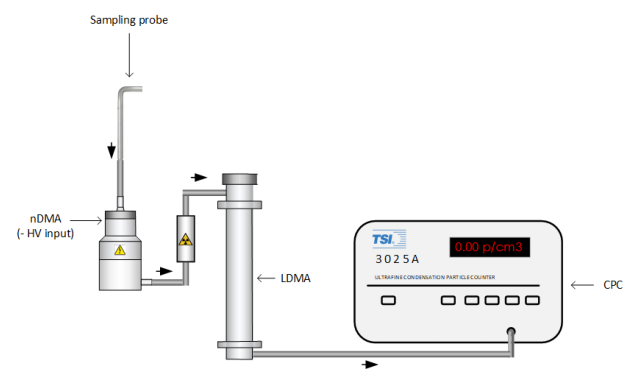

<Figure size 640x480 with 0 Axes>

In [10]:
app = MyGUI()
app.window.mainloop()